In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import imageio


In [2]:
A = imageio.imread('dog.jpeg')
A = A.astype(float) / 255.
img_size = A.shape
main_X = A.reshape(img_size[0] * img_size[1], img_size[2])

In [3]:
from init_centroids import init_centroids
iterations = 10

In [4]:
def euclidean_norm(P):
    result = 0
    for i in range(len(P)):
        result += (abs(P[i]))**2
    return result

In [5]:
def trunc(values, decs=2):
    return np.trunc(values*10**decs)/(10**decs)

In [6]:
final_images = []

In [7]:
K = [2,4,8,16]

In [8]:
for k in K:
    centroids = init_centroids(_,k)
    X = main_X.copy()
    for iteration in range(1,iterations+1):
        C = [[] for i in range(k)]
        Y = []
        for m in range(len(X)):
            x = X[m]
            d = []
            for i in range(k):
                d.append(euclidean_norm(x-centroids[i]))
            min_distance = min(d)
            for i in range(k):
                if d[i] == min_distance:
                    C[i].append(x)
                    Y.append(i)
        for i in range(k):
            if len(C[i]) > 0:
                centroids[i] = np.mean(C[i],axis=0)
    newImage = X.copy()
    for m in range(len(newImage)):
        newImage[m] = centroids[Y[m]]
    newImage = newImage.reshape(img_size[0] , img_size[1], img_size[2])
    imageio.imwrite("k={}.jpeg".format(k),(newImage*255).astype(np.uint8))
    final_images.append(newImage.copy())

# K=2

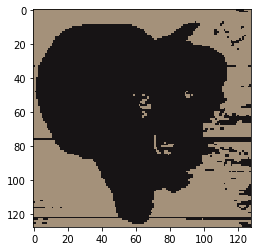

In [10]:
plt.imshow((final_images[0]*255).astype(np.uint8))

# K=4

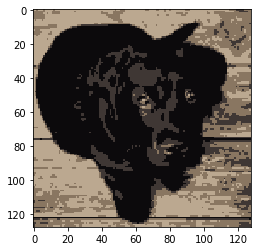

In [11]:
plt.imshow((final_images[1]*255).astype(np.uint8))

# K=8

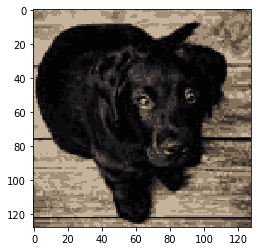

In [12]:
plt.imshow((final_images[2]*255).astype(np.uint8))

# K=16

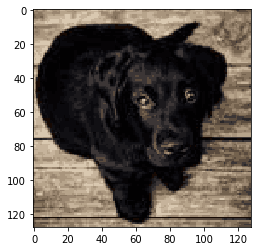

In [13]:
plt.imshow((final_images[3]*255).astype(np.uint8))